# Clustering II

### Dendrograms

In [1]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Ex.1 Plot the data.

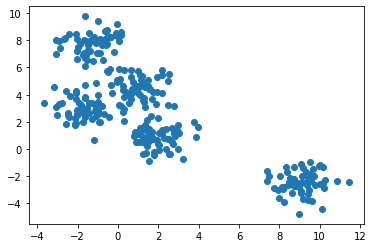

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

#### Ex.2 Use the Means function with k=2 to assign points to clusters.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [4]:
km_pred = kmeans.predict(X)

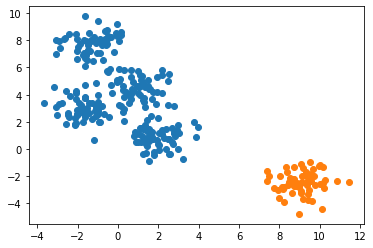

In [5]:
for i in range(4):
    plt.scatter(X[i==km_pred,0],X[i==km_pred,1])

#### Ex.3 Use the scipy libraries to draw the dendrogram for the data:

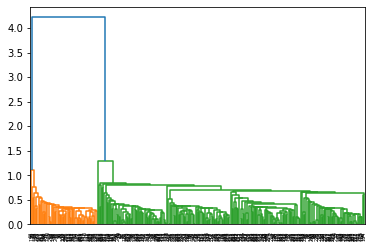

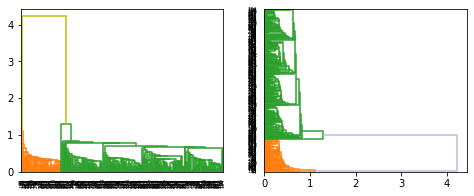

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'single')
plt.figure()
dn = dendrogram(Z)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
dn1 = dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top')
dn2 = dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right')

plt.show()

#### Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

In [7]:
X, y_true = make_blobs(n_samples=100, centers=5,
                       cluster_std=0.8, random_state=0)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
km_pred = kmeans.predict(X)


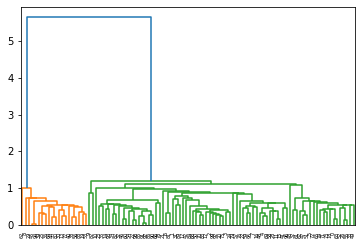

In [8]:
Z = linkage(X, 'single')
plt.figure()
dn = dendrogram(Z)

plt.show()

### Agglomerative clustering

#### Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [9]:
import pandas as pd

dataset = pd.read_csv('shopping_data.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
clustering_dataset = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
clustering_dataset

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Ex.6 Create a dendrogram to chose the appropriate k value.

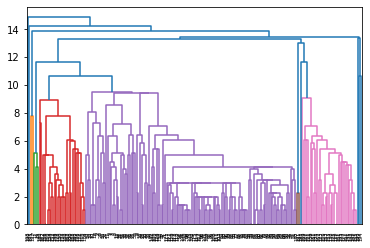

In [11]:
Z = linkage(clustering_dataset.values)
plt.figure()
dn = dendrogram(Z)

plt.show()

#### Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).

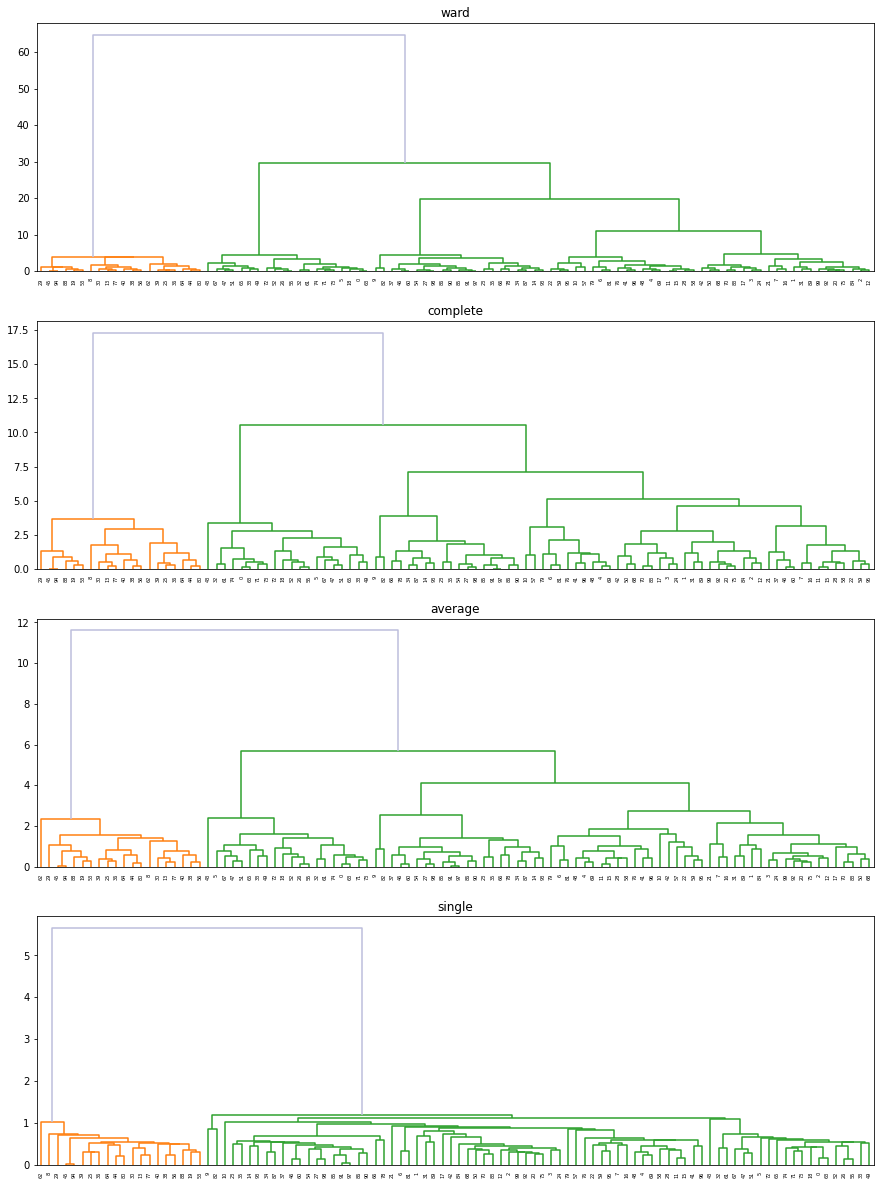

In [12]:
linkage_methods = ['ward', 'complete', 'average', 'single']


fig, axs = plt.subplots(len(linkage_methods),figsize=(15, 21))

for i in range (len(linkage_methods)):
  Z = linkage(X, linkage_methods[i])
  dn = dendrogram(Z, ax=axs[i], above_threshold_color='#bcbddc', orientation='top')
  axs[i].set_title(linkage_methods[i])

plt.show()

#### Ex.8 Use the Agglomerative Clustering class of the sklearn.cluster library to build the model predict clusters.

Automatically created module for IPython interactive environment


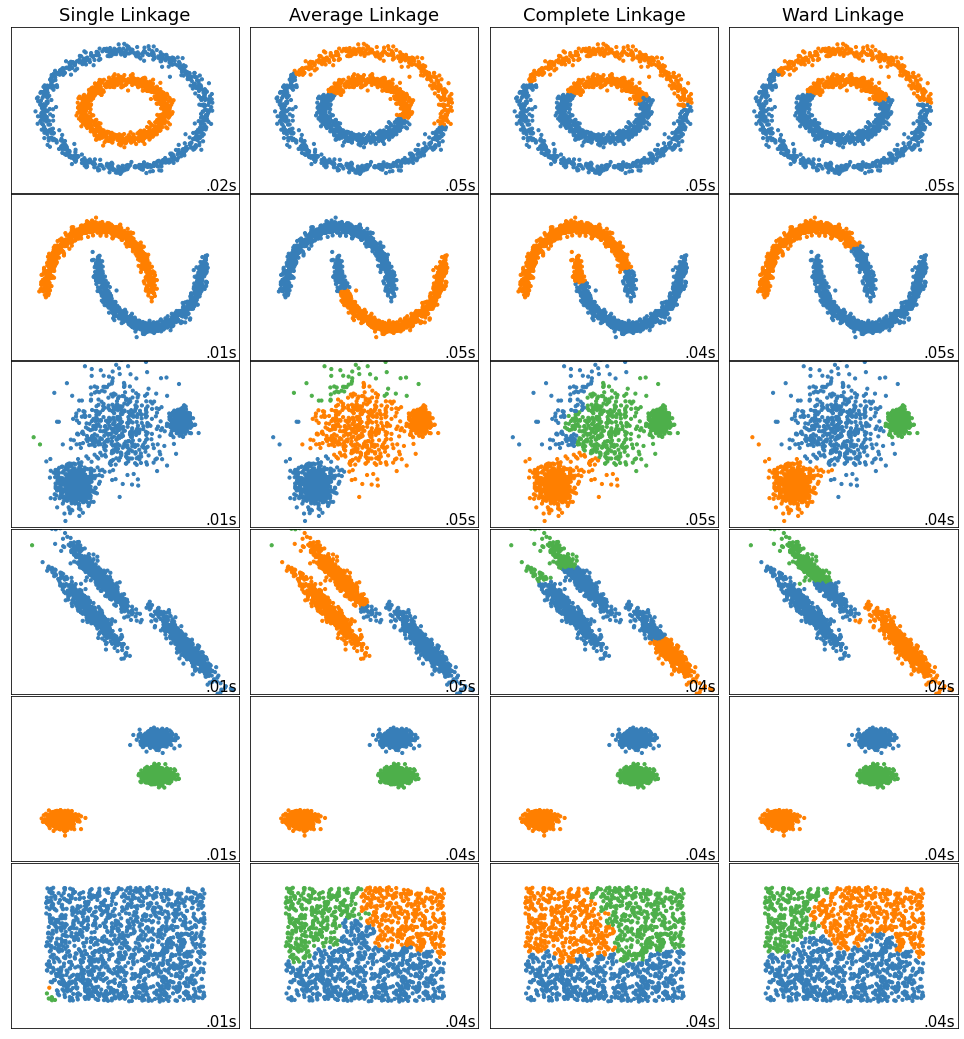

In [13]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

#### Ex.9 Plot the clusters to see how actually our data has been clustered.

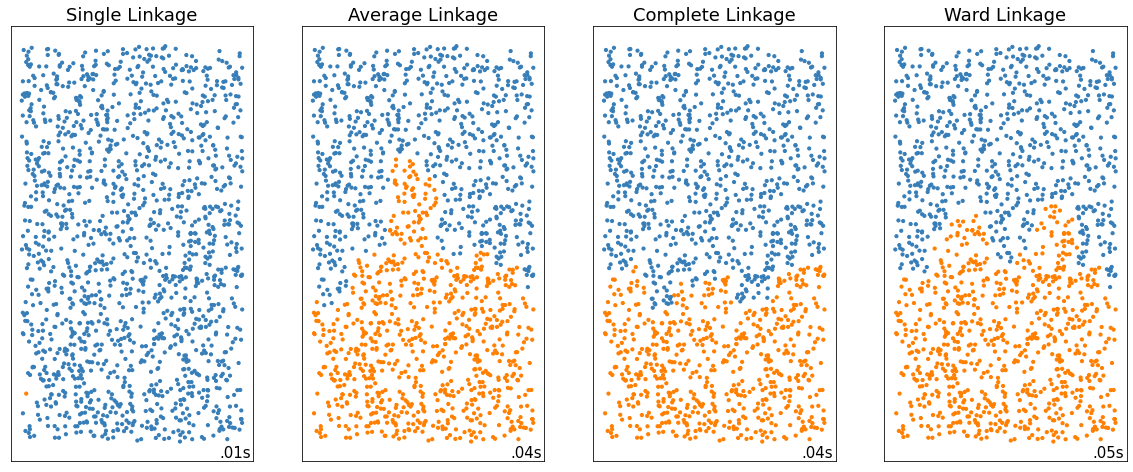

In [14]:
X = StandardScaler().fit_transform(X)

ward = cluster.AgglomerativeClustering(linkage='ward')
complete = cluster.AgglomerativeClustering(linkage='complete')
average = cluster.AgglomerativeClustering(linkage='average')
single = cluster.AgglomerativeClustering(linkage='single')

clustering_algorithms = (('Single Linkage', single), ('Average Linkage', average),
                         ('Complete Linkage', complete), ('Ward Linkage', ward))

plot_num = 1
plt.figure(figsize=(20, 8))

for name, algorithm in clustering_algorithms:
  t0 = time.time()

  # catch warnings related to kneighbors_graph
  with warnings.catch_warnings():
      warnings.filterwarnings(
          "ignore",
          message="the number of connected components of the " +
          "connectivity matrix is [0-9]{1,2}" +
          " > 1. Completing it to avoid stopping the tree early.",
          category=UserWarning)
      algorithm.fit(X)

  t1 = time.time()
  if hasattr(algorithm, 'labels_'):
      y_pred = algorithm.labels_.astype(int)
  else:
      y_pred = algorithm.predict(X)

  plt.subplot(1, len(clustering_algorithms), plot_num)
  plt.title(name, size=18)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                        '#f781bf', '#a65628', '#984ea3',
                                        '#999999', '#e41a1c', '#dede00']),
                                int(max(y_pred) + 1))))
  plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

  plt.xticks(())
  plt.yticks(())
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
            transform=plt.gca().transAxes, size=15,
            horizontalalignment='right')
  plot_num+=1
plt.show()

### Selecting the number of clusters with silhouette analysis on KMeans clustering

#### Ex.1 Create the dataset:

In [15]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

#### Ex.2 Determine the cluster range [2,3….]

In [16]:
range_n_clusters = range(2,7)

#### Ex.3 Iterate for all the values in cluster range:

    Perform k-Means
    Calculate and print the silhouette_score
    Compute the silhouette scores for each sample more
    # Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot
    Have a look here to check you solution and plot the silhouette plot more

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


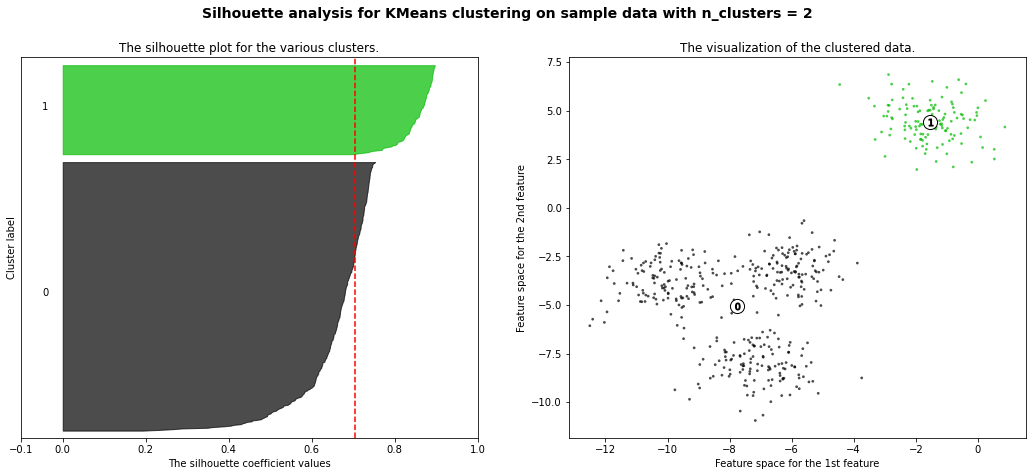

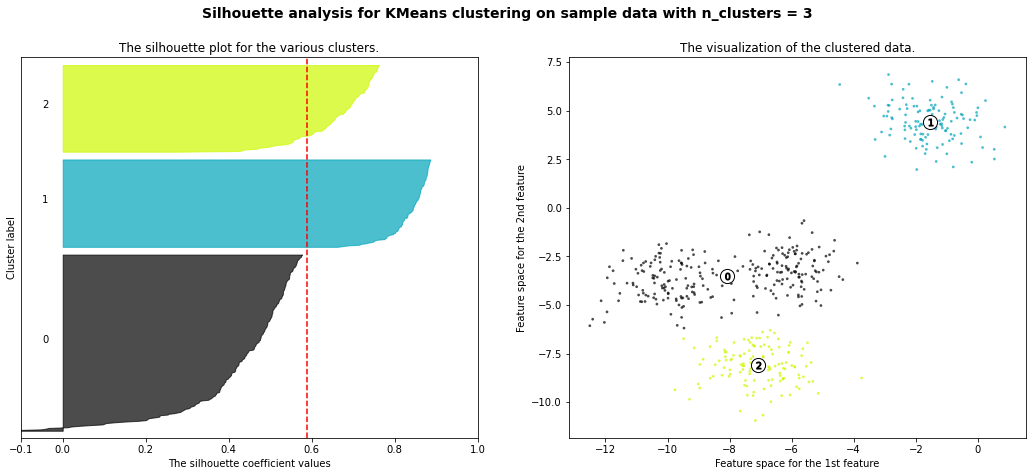

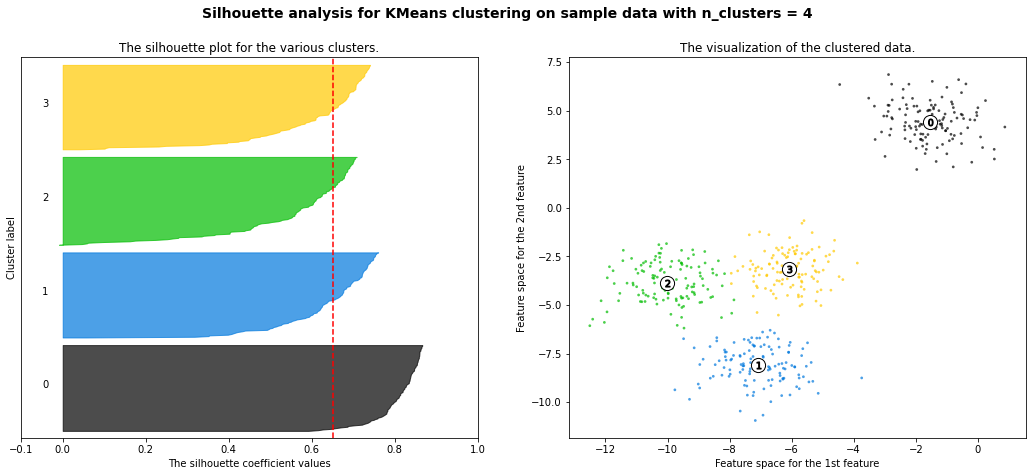

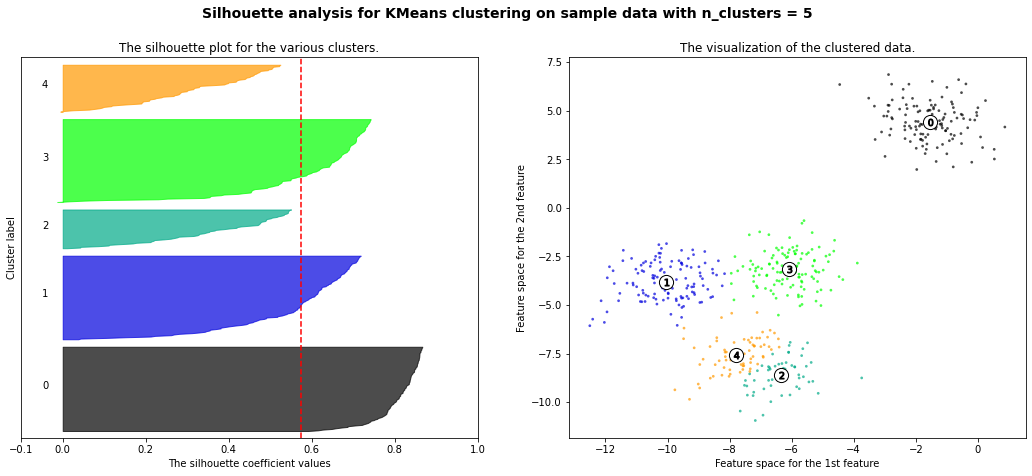

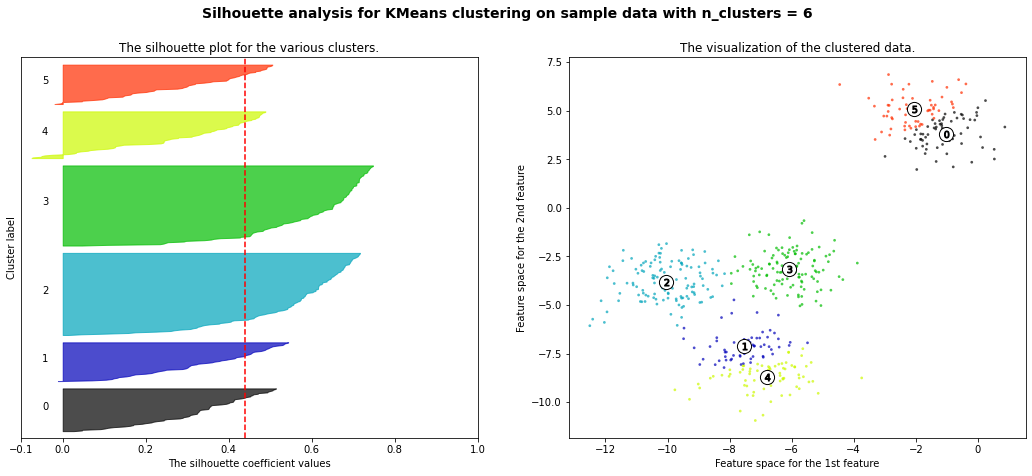

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### DBSCAN algorithm

#### Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:

In [18]:
from sklearn import  datasets
import numpy as np

# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

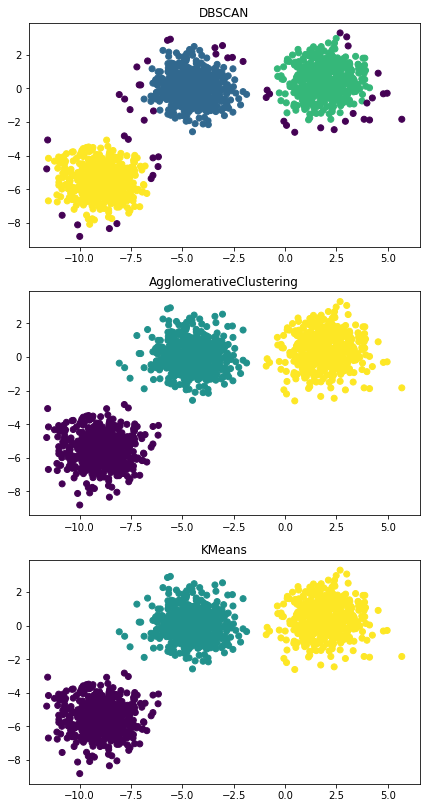

In [19]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

clustering_dbscan = DBSCAN(min_samples=5).fit(X)
clustering_agglomerative = AgglomerativeClustering(n_clusters=3).fit(X)
k_means = KMeans(init='random', n_clusters=3).fit(X)


fig, ax = plt.subplots(3,1, figsize=(7,14))
ax[0].scatter(X[:,0], X[:,1], c=clustering_dbscan.labels_)
ax[0].title.set_text('DBSCAN')
ax[1].scatter(X[:,0], X[:,1], c=clustering_agglomerative.labels_)
ax[1].title.set_text('AgglomerativeClustering')
ax[2].scatter(X[:,0], X[:,1], c=k_means.predict(X))
ax[2].title.set_text('KMeans')

# PCA

#### Task 1

In [20]:
import matplotlib as mpl

In [21]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [23]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [24]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [25]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [26]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [27]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


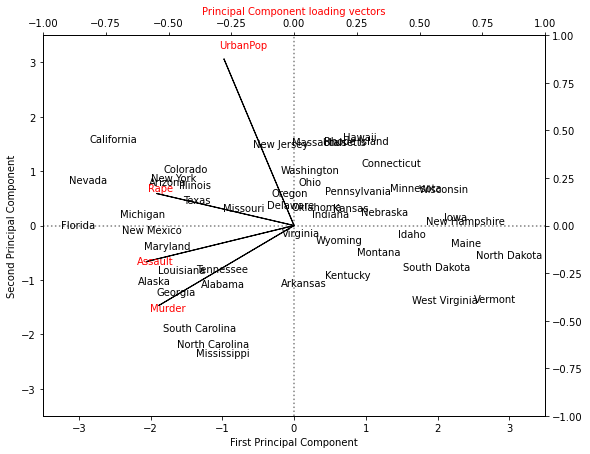

In [28]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [29]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [30]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x7f1e6656cb10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

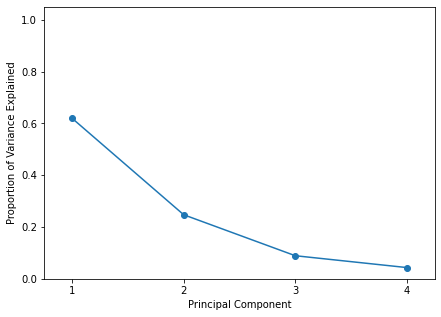

In [31]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x7f1e64475390>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

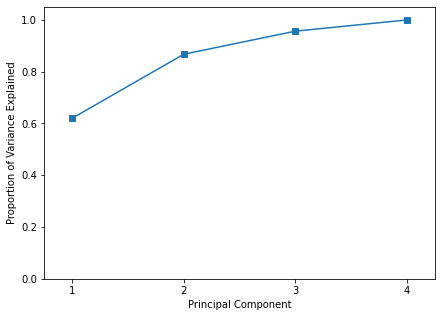

In [32]:

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

In [33]:
df2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [34]:
# Read in the labels to check our work later
y = pd.read_csv('nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [35]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape

# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

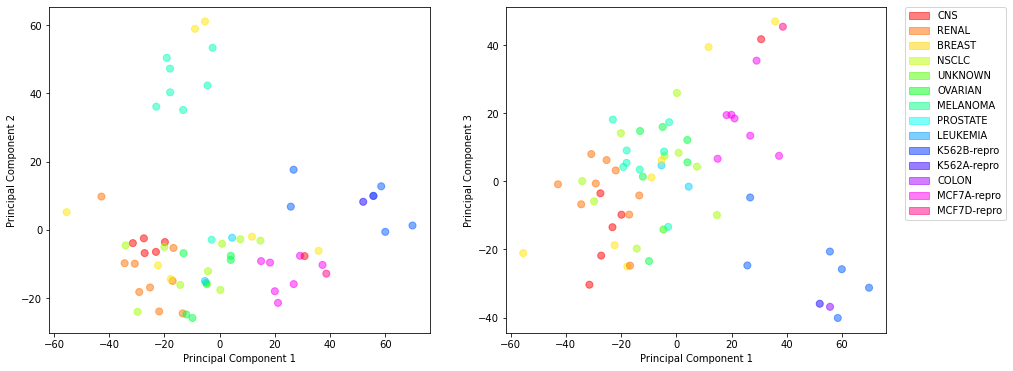

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [37]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

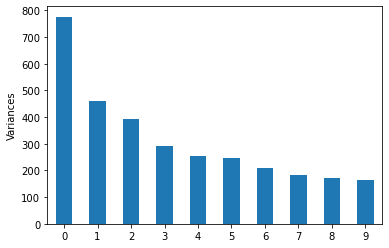

In [38]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

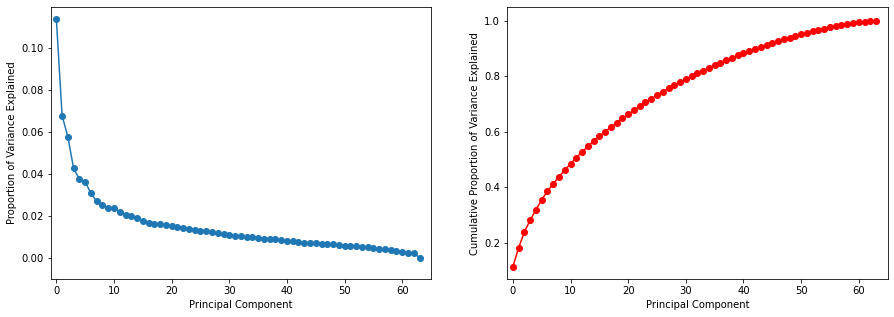

In [39]:

fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)

#### Task 2
Celem zadanie jest wyznaczenie liczby głównych składowych zachowując kompromis między mocą obliczeniową, a skutecznością klasyfikatora.
Zadanie proszę wykonać na dowolnej bazie danych dostępnej w Pythonie: Datasets
Kroki algorytmu:
1. Standaryzacja danych: (convert infs to nans, remove nans, keep only numeric features, scale)
2. Podziel dane na testowe i treningowe (75-25%)
3. Utworzenie macierzy kowariancji
4. Wyznaczenie wektorów własnych macierzy(główne składowe) oraz związane z nimi wartości własnych
5. Uszereguj wartości własne w malejącej kolejności
6. Narysuj wykres współczynników wariancji wyjaśnionej dla wartości własnych
7. Wybierz k największych wektorów na podstawie sparowanych z nimi wartości własnych

In [40]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()

In [41]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [42]:
df = pd.DataFrame(data.data)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


1. Standaryzacja danych: (convert infs to nans, remove nans, keep only numeric features, scale)

In [45]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [46]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [47]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [48]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [49]:
y = pd.DataFrame(data.target)

In [50]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


2. Podziel dane na testowe i treningowe (75-25%)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=634)

3. Utworzenie macierzy kowariancji

In [52]:
cov_matrix = np.cov(X_train)

In [53]:
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,...,369,370,371,372,373,374,375,376,377,378
0,0.465296,0.115155,-0.259151,0.164059,-0.493346,0.098645,0.051193,0.415884,0.130155,0.089255,...,0.271320,0.348258,0.315107,-0.592282,-0.380209,-0.181952,0.199084,0.044399,-0.106728,0.290803
1,0.115155,0.378540,0.119598,0.296755,-0.402125,0.004756,-0.047886,0.228161,0.054613,-0.271027,...,0.335664,0.167570,0.130430,-0.423274,-0.365275,-0.265568,0.051610,0.045136,-0.138117,0.354697
2,-0.259151,0.119598,0.978712,-0.494250,-0.327486,0.209668,0.342248,-0.327899,0.083102,0.105594,...,0.403755,-0.132401,-0.097565,-0.349795,-0.066214,-0.046269,0.085861,0.019682,-0.420954,0.120606
3,0.164059,0.296755,-0.494250,0.994336,0.051438,-0.141684,-0.384389,0.226886,0.016885,-0.318356,...,-0.205749,0.162335,0.035850,0.105406,-0.178461,-0.286409,-0.060243,0.150216,0.133981,-0.008417
4,-0.493346,-0.402125,-0.327486,0.051438,1.938008,-0.405939,-0.240514,-0.596524,-0.423058,-0.203070,...,-0.803634,-0.552624,-0.590180,2.108851,1.105746,0.495025,-0.501888,-0.470175,0.449397,-0.808185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.181952,-0.265568,-0.046269,-0.286409,0.495025,-0.114728,-0.019805,-0.278569,-0.184278,0.079067,...,-0.473253,-0.259039,-0.289633,0.495159,0.326103,0.574784,-0.224626,-0.386681,0.422117,-0.476746
375,0.199084,0.051610,0.085861,-0.060243,-0.501888,0.156002,0.178896,0.197521,0.145860,0.180640,...,0.366118,0.249681,0.254125,-0.611087,-0.324135,-0.224626,0.250512,0.059838,-0.259028,0.319081
376,0.044399,0.045136,0.019682,0.150216,-0.470175,0.140560,-0.033821,0.008452,0.186235,0.044842,...,-0.047663,-0.010004,0.032823,-0.391918,-0.810273,-0.386681,0.059838,1.359186,-0.335817,-0.055467
377,-0.106728,-0.138117,-0.420954,0.133981,0.449397,-0.219661,-0.270712,-0.055970,-0.183868,-0.200990,...,-0.565358,-0.135286,-0.203617,0.501208,1.000543,0.422117,-0.259028,-0.335817,0.671573,-0.369982


4. Wyznaczenie wektorów własnych macierzy(główne składowe) oraz związane z nimi wartości własnych

In [54]:
w, v = np.linalg.eig(cov_matrix)
explained_variances = [w_i/np.sum(w) for w_i in w]
explained_variances[:5]

[(0.4442805915197762+0j),
 (0.1350433386821798+0j),
 (0.10163472526003896+0j),
 (0.0793947384999435+0j),
 (0.06812889016909378+0j)]

5. Uszereguj wartości własne w malejącej kolejności

In [55]:
sorted_w_v = sorted(zip(w, v), reverse=True)
w_sorted, v_sorted = [ list(storted_touple) for storted_touple in  zip(*sorted_w_v)]
sorted_explained_variances = [w_i/np.sum(w_sorted) for w_i in w_sorted]

6. Narysuj wykres współczynników wariancji wyjaśnionej dla wartości własnych

/home/wkula/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


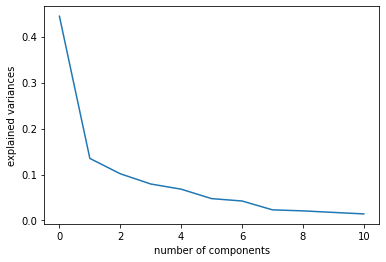

In [56]:
plt.plot(sorted_explained_variances[:11])
plt.ylabel('explained variances')
plt.xlabel('number of components')

plt.show()

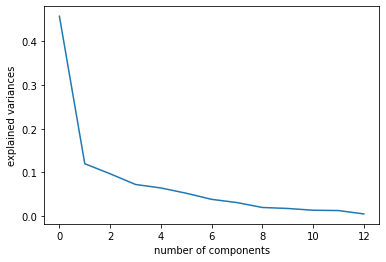

In [57]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variances')
plt.show()

7. Wybierz k największych wektorów na podstawie sparowanych z nimi wartości własnych

In [58]:
k=2
v_sorted[:k]

[array([-0.03068482+0.00000000e+00j,  0.02489372+0.00000000e+00j,
        -0.04680127+0.00000000e+00j,  0.01367386+0.00000000e+00j,
         0.05648593+0.00000000e+00j, -0.00483668+0.00000000e+00j,
         0.01419111+0.00000000e+00j,  0.03809377+0.00000000e+00j,
         0.04182811+0.00000000e+00j,  0.09212911+0.00000000e+00j,
         0.05878183+0.00000000e+00j, -0.04052522+0.00000000e+00j,
         0.00161312+0.00000000e+00j,  0.00635977+6.47608621e-03j,
         0.00635977-6.47608621e-03j,  0.01267323-1.78046275e-02j,
         0.01267323+1.78046275e-02j, -0.00197058+3.68312247e-03j,
        -0.00197058-3.68312247e-03j, -0.00119421+1.74641887e-02j,
        -0.00119421-1.74641887e-02j, -0.00297902-1.40967366e-02j,
        -0.00297902+1.40967366e-02j,  0.00201511-2.08255505e-02j,
         0.00201511+2.08255505e-02j,  0.02987128+2.50791199e-02j,
         0.02987128-2.50791199e-02j,  0.00981592+6.59624479e-03j,
         0.00981592-6.59624479e-03j, -0.02331668+0.00000000e+00j,
        -0